Suhanee Kandalkar D16AD 30

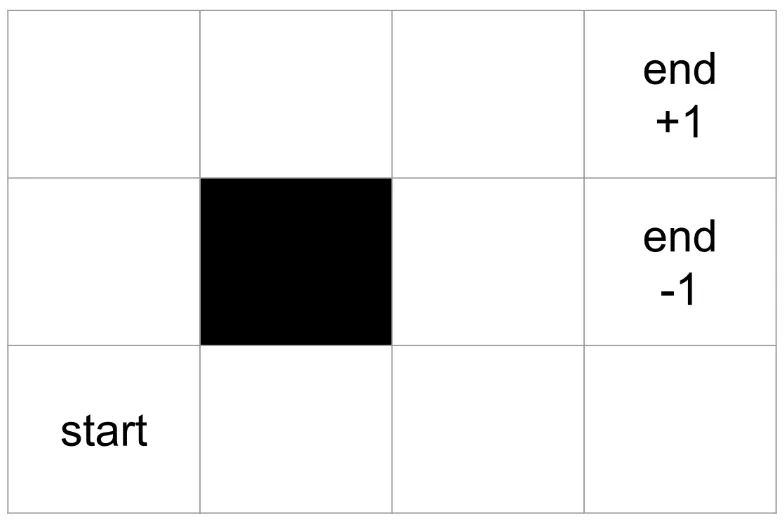


Training with alpha = 1.0, Noise = False
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]]
[[0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]

Training with alpha = 0.1, Noise = False
[[1. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]]
[[0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 2.]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 1.]]

Training with alpha = 0.1, Noise = True
[[1. 0. 0. 0.]
 [0. 0

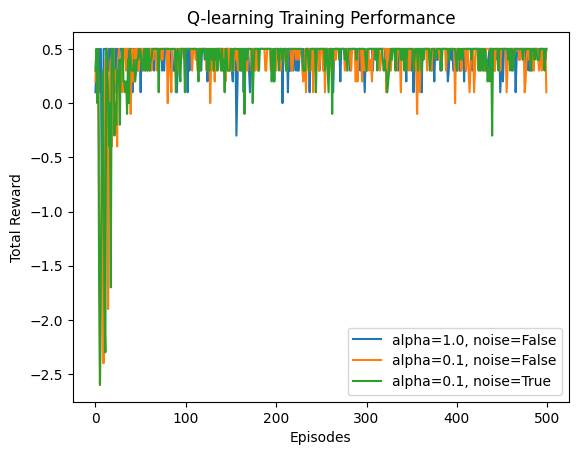

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Define the GridWorld Environment
class GridWorld:
    def __init__(self, size=4):
        self.size = size
        self.state = (0, 0)  # Start position
        self.goal = (size - 1, size - 1)  # Goal position
        self.actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]  # Right, Down, Left, Up

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        new_state = (self.state[0] + self.actions[action][0], self.state[1] + self.actions[action][1])

        # Ensure the agent stays within bounds
        new_state = (max(0, min(self.size - 1, new_state[0])), max(0, min(self.size - 1, new_state[1])))

        # Reward and termination check
        reward = 1 if new_state == self.goal else -0.1
        done = new_state == self.goal

        self.state = new_state
        return new_state, reward, done

    def render(self):
        grid = np.zeros((self.size, self.size))
        grid[self.goal] = 2  # Goal state
        grid[self.state] = 1  # Agent's position
        print(grid)

# Q-learning agent
class QLearningAgent:
    def __init__(self, env, alpha=1.0, gamma=0.9, epsilon=0.1):
        self.env = env
        self.q_table = np.zeros((env.size, env.size, len(env.actions)))
        self.alpha = alpha  # Learning rate
        self.gamma = gamma  # Discount factor
        self.epsilon = epsilon  # Exploration rate

    def choose_action(self, state):
        if random.uniform(0, 1) < self.epsilon:
            return random.choice(range(len(self.env.actions)))  # Explore
        else:
            return np.argmax(self.q_table[state[0], state[1]])  # Exploit

    def update(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state[0], next_state[1]])
        td_target = reward + self.gamma * self.q_table[next_state[0], next_state[1], best_next_action]
        td_error = td_target - self.q_table[state[0], state[1], action]
        self.q_table[state[0], state[1], action] += self.alpha * td_error

# Training the agent
def train(env, agent, episodes=1000):
    rewards = []
    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False
        while not done:
            action = agent.choose_action(state)
            next_state, reward, done = env.step(action)
            agent.update(state, action, reward, next_state)
            state = next_state
            total_reward += reward
        rewards.append(total_reward)
    return rewards

# Experiment with different learning rates
alphas = [1.0, 0.1, 0.1]
noisy = [False, False, True]

for i, alpha in enumerate(alphas):
    print(f"\nTraining with alpha = {alpha}, Noise = {noisy[i]}")
    env = GridWorld(size=4)
    agent = QLearningAgent(env, alpha=alpha)
    rewards = train(env, agent, episodes=500)

    # Plot the training progress
    plt.plot(rewards, label=f'alpha={alpha}, noise={noisy[i]}')

    # Test the trained agent
    def test(env, agent):
        state = env.reset()
        env.render()
        done = False
        while not done:
            action = np.argmax(agent.q_table[state[0], state[1]])
            state, _, done = env.step(action)
            env.render()

    test(env, agent)

plt.xlabel('Episodes')
plt.ylabel('Total Reward')
plt.title('Q-learning Training Performance')
plt.legend()
plt.show()



Another Grid

In [ ]:
import numpy as np

# global variables
BOARD_ROWS = 3
BOARD_COLS = 4
WIN_STATE = (0, 3)
LOSE_STATE = (1, 3)
START = (2, 0)
DETERMINISTIC = True


class State:
    def __init__(self, state=START):
        self.board = np.zeros([BOARD_ROWS, BOARD_COLS])
        self.board[1, 1] = -1
        self.state = state
        self.isEnd = False
        self.determine = DETERMINISTIC

    def giveReward(self):
        if self.state == WIN_STATE:
            return 1
        elif self.state == LOSE_STATE:
            return -1
        else:
            return 0

    def isEndFunc(self):
        if (self.state == WIN_STATE) or (self.state == LOSE_STATE):
            self.isEnd = True

    def nxtPosition(self, action):
        """
        action: up, down, left, right
        -------------
        0 | 1 | 2| 3|
        1 |
        2 |
        return next position
        """
        if self.determine:
            if action == "up":
                nxtState = (self.state[0] - 1, self.state[1])
            elif action == "down":
                nxtState = (self.state[0] + 1, self.state[1])
            elif action == "left":
                nxtState = (self.state[0], self.state[1] - 1)
            else:
                nxtState = (self.state[0], self.state[1] + 1)
            # if next state legal
            if (nxtState[0] >= 0) and (nxtState[0] <= (BOARD_ROWS -1)):
                if (nxtState[1] >= 0) and (nxtState[1] <= (BOARD_COLS -1)):
                    if nxtState != (1, 1):
                        return nxtState
            return self.state

    def showBoard(self):
        self.board[self.state] = 1
        for i in range(0, BOARD_ROWS):
            print('-----------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                if self.board[i, j] == 1:
                    token = '*'
                if self.board[i, j] == -1:
                    token = 'z'
                if self.board[i, j] == 0:
                    token = '0'
                out += token + ' | '
            print(out)
        print('-----------------')


# Agent of player

class Agent:

    def __init__(self):
        self.states = []
        self.actions = ["up", "down", "left", "right"]
        self.State = State()
        self.lr = 0.2
        self.exp_rate = 0.3

        # initial state reward
        self.state_values = {}
        for i in range(BOARD_ROWS):
            for j in range(BOARD_COLS):
                self.state_values[(i, j)] = 0  # set initial value to 0

    def chooseAction(self):
        # choose action with most expected value
        mx_nxt_reward = 0
        action = ""

        if np.random.uniform(0, 1) <= self.exp_rate:
            action = np.random.choice(self.actions)
        else:
            # greedy action
            for a in self.actions:
                # if the action is deterministic
                nxt_reward = self.state_values[self.State.nxtPosition(a)]
                if nxt_reward >= mx_nxt_reward:
                    action = a
                    mx_nxt_reward = nxt_reward
        return action

    def takeAction(self, action):
        position = self.State.nxtPosition(action)
        return State(state=position)

    def reset(self):
        self.states = []
        self.State = State()

    def play(self, rounds=10):
        i = 0
        while i < rounds:
            # to the end of game back propagate reward
            if self.State.isEnd:
                # back propagate
                reward = self.State.giveReward()
                # explicitly assign end state to reward values
                self.state_values[self.State.state] = reward  # this is optional
                print("Game End Reward", reward)
                for s in reversed(self.states):
                    reward = self.state_values[s] + self.lr * (reward - self.state_values[s])
                    self.state_values[s] = round(reward, 3)
                self.reset()
                i += 1
            else:
                action = self.chooseAction()
                # append trace
                self.states.append(self.State.nxtPosition(action))
                print("current position {} action {}".format(self.State.state, action))
                # by taking the action, it reaches the next state
                self.State = self.takeAction(action)
                # mark is end
                self.State.isEndFunc()
                print("nxt state", self.State.state)
                print("---------------------")

    def showValues(self):
        for i in range(0, BOARD_ROWS):
            print('----------------------------------')
            out = '| '
            for j in range(0, BOARD_COLS):
                out += str(self.state_values[(i, j)]).ljust(6) + ' | '
            print(out)
        print('----------------------------------')


if __name__ == "__main__":
    ag = Agent()
    ag.play(50)
    print(ag.showValues())

current position (2, 0) action right
nxt state (2, 1)
---------------------
current position (2, 1) action right
nxt state (2, 2)
---------------------
current position (2, 2) action right
nxt state (2, 3)
---------------------
current position (2, 3) action right
nxt state (2, 3)
---------------------
current position (2, 3) action right
nxt state (2, 3)
---------------------
current position (2, 3) action up
nxt state (1, 3)
---------------------
Game End Reward -1
current position (2, 0) action left
nxt state (2, 0)
---------------------
current position (2, 0) action left
nxt state (2, 0)
---------------------
current position (2, 0) action up
nxt state (1, 0)
---------------------
current position (1, 0) action right
nxt state (1, 0)
---------------------
current position (1, 0) action right
nxt state (1, 0)
---------------------
current position (1, 0) action right
nxt state (1, 0)
---------------------
current position (1, 0) action left
nxt state (1, 0)
---------------------
cu